In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

**Loading Dataset**

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

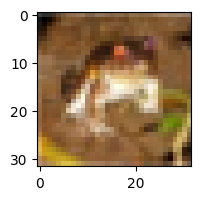

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

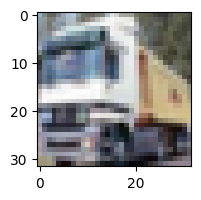

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

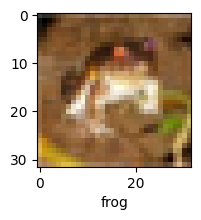

In [ ]:
plot_sample(X_train, y_train, 0)

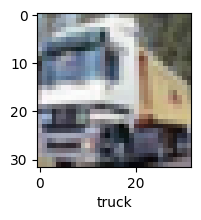

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
# Normalizing Data

X_train = X_train / 255.0
X_test = X_test / 255.0

## **Build simple ANN for image classification**

In [ ]:
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(32, 32, 3)))
ann_model.add(Dense(3000, activation='relu'))
ann_model.add(Dense(1000, activation='relu'))
ann_model.add(Dense(10, activation='softmax'))

In [ ]:
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
ann_model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 20s 10ms/step - loss: 1.8938 - accuracy: 0.3252 - val_loss: 1.7346 - val_accuracy: 0.3735
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6710 - accuracy: 0.4001 - val_loss: 1.6196 - val_accuracy: 0.4140
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5909 - accuracy: 0.4261 - val_loss: 1.5553 - val_accuracy: 0.4399
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5419 - accuracy: 0.4470 - val_loss: 1.5099 - val_accuracy: 0.4663
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5139 - accuracy: 0.4552 - val_loss: 1.5576 - val_accuracy: 0.4482
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4818 - accuracy: 0.4690 - val_loss: 1.5339 - val_accuracy: 0.4454
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4585 - accuracy: 0.4784 - val_loss: 1.4791 - val_ac

In [ ]:
ann_loss, ann_acc = ann_model.evaluate(X_test, y_test)
print('ANN Test Accuracy:', ann_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.4593 - accuracy: 0.4871
ANN Test Accuracy: 0.4871000051498413


 Accuracy is at around 49%

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.51      0.54      1000
           1       0.59      0.58      0.59      1000
           2       0.37      0.38      0.37      1000
           3       0.36      0.33      0.35      1000
           4       0.38      0.45      0.41      1000
           5       0.43      0.33      0.38      1000
           6       0.49      0.55      0.52      1000
           7       0.52      0.59      0.55      1000
           8       0.68      0.56      0.62      1000
           9       0.51      0.59      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



## **Build a convolutional neural network to train our images**

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
1563/1563 [==============================] - 12s 6ms/step - loss: 1.4466 - accuracy: 0.4784 - val_loss: 1.2086 - val_accuracy: 0.5616
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0883 - accuracy: 0.6154 - val_loss: 1.0250 - val_accuracy: 0.6412
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9626 - accuracy: 0.6650 - val_loss: 0.9671 - val_accuracy: 0.6660
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8797 - accuracy: 0.6947 - val_loss: 0.9261 - val_accuracy: 0.6787
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8155 - accuracy: 0.7167 - val_loss: 0.9193 - val_accuracy: 0.6822
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7592 - accuracy: 0.7365 - val_loss: 0.9142 - val_accuracy: 0.6958
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7127 - accuracy: 0.7510 - val_loss: 0.9661 - val_accurac

With CNN, accuracy is at around 67%, which is a significant improvement over ANN (49% accuracy).

In [ ]:
# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print('CNN Test Accuracy:', cnn_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.0411 - accuracy: 0.6771
CNN Test Accuracy: 0.6771000027656555


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70      1000
           1       0.88      0.73      0.80      1000
           2       0.49      0.64      0.55      1000
           3       0.55      0.44      0.49      1000
           4       0.65      0.58      0.61      1000
           5       0.66      0.50      0.57      1000
           6       0.72      0.79      0.75      1000
           7       0.70      0.74      0.72      1000
           8       0.75      0.82      0.79      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



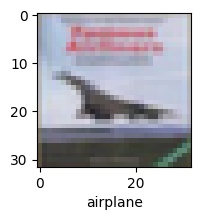

In [ ]:
plot_sample(X_test, y_test,3)

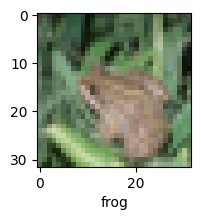

In [ ]:
plot_sample(X_test, y_test,4)